# Unzip file of dataset

In [ ]:
!mkdir /content/images
!tar --gunzip --extract --verbose --file=/content/drive/MyDrive/part2.tar.gz
!cp  /content/part2/* /content/images

Streaming output truncated to the last 5000 lines.
part2/32_1_0_20170117182528940.jpg
part2/31_0_0_20170117181559819.jpg
part2/29_1_1_20170112235125873.jpg
part2/35_0_1_20170116025838482.jpg
part2/35_0_3_20170117171648788.jpg
part2/24_1_1_20170112233340647.jpg
part2/28_0_0_20170117020729301.jpg
part2/35_0_0_20170117191433859.jpg
part2/35_0_0_20170117175724098.jpg
part2/70_0_0_20170117173652480.jpg
part2/23_1_0_20170116221828462.jpg
part2/24_1_1_20170113011232616.jpg
part2/38_0_0_20170117120142691.jpg
part2/42_1_0_20170117163607667.jpg
part2/26_1_1_20170116224135754.jpg
part2/40_0_0_20170117170636232.jpg
part2/38_0_0_20170117191429314.jpg
part2/54_1_0_20170117171158860.jpg
part2/36_1_0_20170112230658796.jpg
part2/24_0_4_20170117194356247.jpg
part2/39_0_3_20170113142218164.jpg
part2/27_0_0_20170117184509194.jpg
part2/30_1_0_20170117144452546.jpg
part2/26_1_3_20170117173846653.jpg
part2/55_0_3_20170117175522223.jpg
part2/54_0_0_20170117171614274.jpg
part2/24_1_2_20170116171604159.jpg
part

# Import Packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from skimage import io,transform
import random
from tensorflow.keras import layers

# Use data in name of files

UTKface 

https://susanqq.github.io/UTKFace/

In [ ]:
path=['/content/part2/']
information=[]
for i in path:
    information.extend(os.listdir(str(i)))


The age and sex is in the names of the images

In [ ]:
def separate_string(x):
  return x,x.replace(".jpg","").split('_')[:2]

information=pd.DataFrame(information)
information=information[:6000]
print(len(information))
information.columns=['name_file']
information=information[information['name_file']!='.DS_Store']
df = information['name_file'].map(separate_string)
csv=[]

for x,lista in df:
  data=[x]
  for dt in lista:
      data.append(dt)
  csv.append(data)

information=pd.DataFrame(csv,columns=['name_file','age','sex'])
information=information[(information['sex']=='1') | (information['sex']=='0')]
information=information[['name_file','sex','age']]
information['age']=information['age'].map(lambda x:int(x))

6000


In [ ]:
information.head(10)

,name_file,sex,age
0,55_0_1_20170113184228007.jpg,0,55
1,58_0_0_20170117194037923.jpg,0,58
2,87_0_1_20170117194805270.jpg,0,87
3,32_0_0_20170117134725446.jpg,0,32
4,38_1_0_20170117184900263.jpg,1,38
5,29_1_1_20170112235118232.jpg,1,29
6,21_0_3_20170117141644440.jpg,0,21
7,65_0_1_20170117182422917.jpg,0,65
8,60_0_0_20170117192255540.jpg,0,60
9,32_1_4_20170117203133752.jpg,1,32


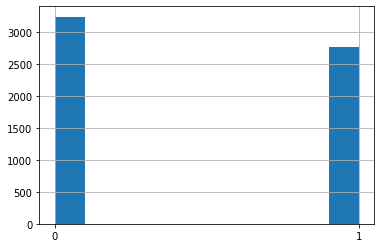

In [ ]:
information['sex'].hist()

#Esta parte muestra como los datos estan muy desequilibrados sin tener todas las partes juntas

<BarContainer object of 98 artists>

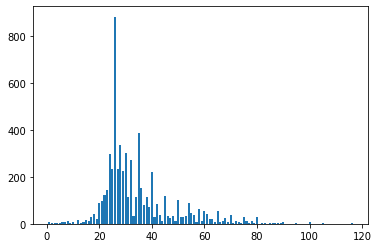

In [ ]:
age_hist=information['age'].value_counts().sort_index()
age_hist=pd.DataFrame(age_hist)
plt.bar(age_hist.index.to_list(),age_hist.iloc[:,0].values.tolist())

- Sex is 0 (male) or 1 (female)
- Age

# Lectura de imagenes

In [ ]:
name_file=information['name_file'].values.tolist()
X=[]
for name in name_file: 
  image = load_img('/content/part2/'+str(name),target_size=(224,224,3))
  image = img_to_array(image)
  image = image.astype('float32')
  X.append(image/255.0)

X=np.array(X)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,
 y, test_size = 0.10,
random_state = 0)

In [ ]:
Y_train=[Y_train[:,1],Y_train[:,0]]
Y_val=[Y_val[:,1],Y_val[:,0]]

# Model

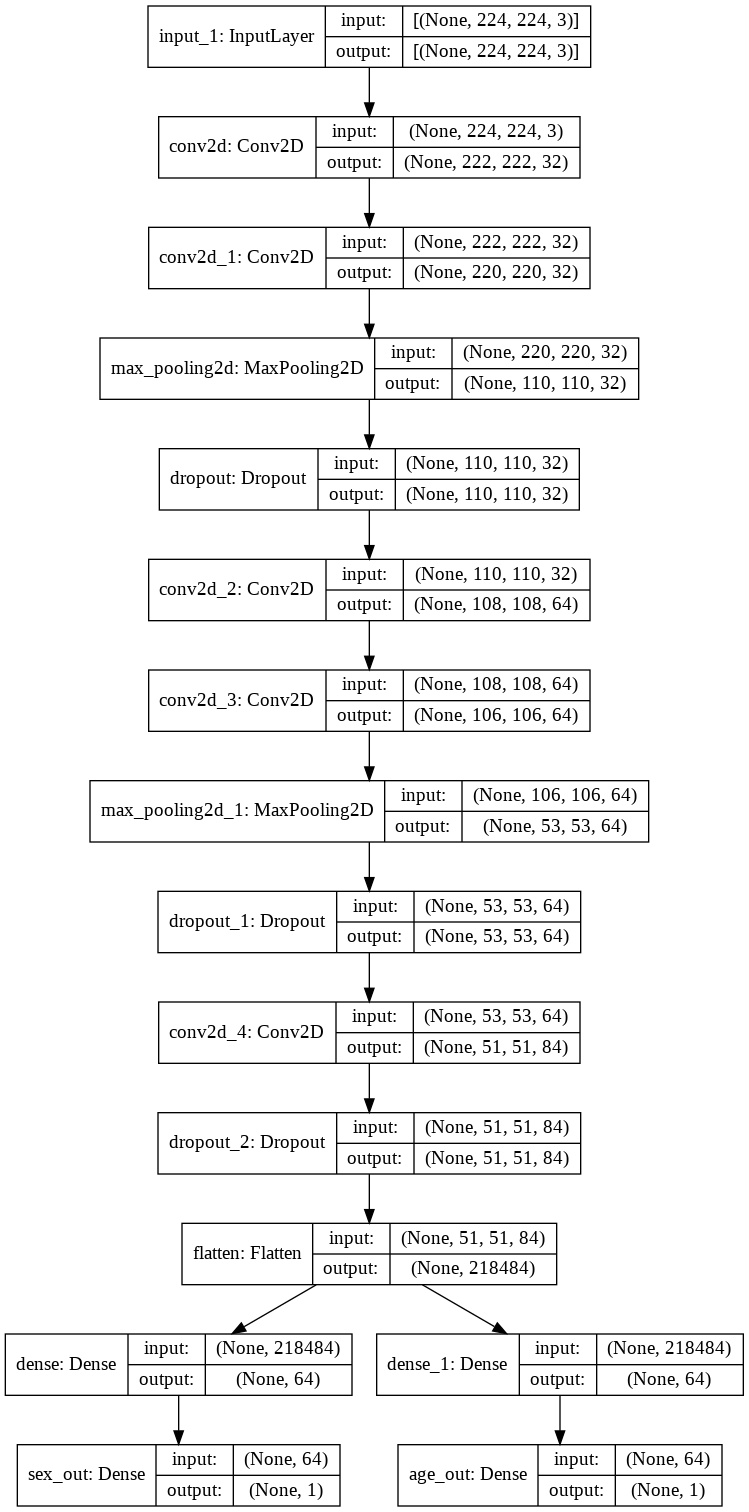

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = inputs
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(84,3,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x1 = layers.Dense(64,activation='relu')(x)
x2 = layers.Dense(64,activation='relu')(x)
x1 = layers.Dense(1,activation='sigmoid',name='sex_out')(x1)
x2 = layers.Dense(1,activation='relu',name='age_out')(x2)
model = tf.keras.models.Model(inputs=inputs, outputs=[x1, x2])
model.compile(optimizer="Adam", loss=['binary_crossentropy','mae'],metrics = ['accuracy'])
tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)

In [ ]:
import random
random_id=random.random()
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss',restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))
]
model.fit(X_train, Y_train, epochs=100,validation_data=(X_val,Y_val),callbacks=callbacks, shuffle=True)

Epoch 1/100
169/169 [==============================] - 58s 135ms/step - loss: 13.8202 - sex_out_loss: 1.2759 - age_out_loss: 12.5443 - sex_out_accuracy: 0.5343 - age_out_accuracy: 0.0010 - val_loss: 9.8351 - val_sex_out_loss: 0.6763 - val_age_out_loss: 9.1588 - val_sex_out_accuracy: 0.5717 - val_age_out_accuracy: 0.0000e+00
Epoch 2/100
169/169 [==============================] - 19s 113ms/step - loss: 10.1855 - sex_out_loss: 0.6712 - age_out_loss: 9.5143 - sex_out_accuracy: 0.5884 - age_out_accuracy: 0.0027 - val_loss: 10.0210 - val_sex_out_loss: 0.6591 - val_age_out_loss: 9.3619 - val_sex_out_accuracy: 0.5883 - val_age_out_accuracy: 0.0000e+00
Epoch 3/100
169/169 [==============================] - 19s 114ms/step - loss: 9.8577 - sex_out_loss: 0.6567 - age_out_loss: 9.2010 - sex_out_accuracy: 0.6107 - age_out_accuracy: 0.0010 - val_loss: 9.9917 - val_sex_out_loss: 0.6413 - val_age_out_loss: 9.3504 - val_sex_out_accuracy: 0.6550 - val_age_out_accuracy: 0.0000e+00
Epoch 4/100
169/169 [===

In [ ]:
img = io.imread("/content/Emma.jpeg")/255.0
img = transform.resize(image=img, output_shape=(224,224))
img2 = img 
img = img.reshape(1,224,224,3)
dic={
    0:"Hombre",
    1:"Mujer"
}

Sexo: Mujer  Edad: 30


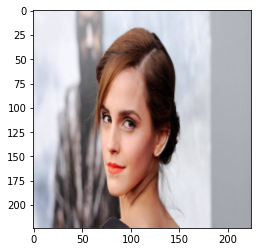

In [ ]:
plt.imshow(img2)
result = model.predict(img)
print("Sexo:",dic[round(result[0][0][0])]," Edad:",round(result[1][0][0]))